# PROJETO: Modelagem de dados da SSP-SP / Modeling of SSP-SP data

## João Leopoldo e Silva - fev/2020

#### dataset: https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil
## 2009

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
import joblib

In [117]:
pd.options.display.max_columns = 200

In [118]:
data_2009_1 = pd.read_csv('.\crime-data-in-brazil\BO_2009_1.csv', low_memory=False).drop(columns=['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'])
data_2009_2 = pd.read_csv('.\crime-data-in-brazil\BO_2009_2.csv', low_memory=False).drop(columns=['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'])
data_2009 = pd.concat([data_2009_1, data_2009_2], ignore_index=True)

In [119]:
def hora(x):
    try:
        if int(x[:2]) < 6:
            return 'Madrugada'
        elif int(x[:2]) < 12:
            return 'Manhã'
        elif int(x[:2]) < 18:
            return 'Tarde'
        else:
            return 'Noite'
    except:
        return 'Indeterminado'

In [120]:
rub_dict = joblib.load('rub_dict')

In [121]:
data_2009['hora'] = data_2009.HORA_OCORRENCIA_BO.apply(hora)

In [156]:
data_2009.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,hora
0,1,2009,10105,DECAP,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,DECAP,DEL.SEC.1º CENTRO,04º D.P. CONSOLAÇÃO,2009,1,01/01/2009,00:20,C,Roubo (art. 157),NaN,TRANSEUNTE,NaN,NaN,S.PAULO,AV PAULISTA,NaN,C,Autor,3.0,I,NaN,NaN,NaN,NaN,Madrugada
1,1,2009,10204,DECAP,DEL.SEC.2º SUL,DEL.PROTECAO IDOSO- 2ª SEC.,DECAP,DEL.SEC.3º OESTE,91º D.P. CEASA,2009,1,05/01/2009,NaN,C,Furto (art. 155),NaN,OUTROS,NaN,NaN,S.PAULO,LIG MARGINAL TIETE ROD DOS BANDEIRANTES,0,C,Vítima,1.0,F,80,Branca,APOSENTADO(A),NaN,Indeterminado
2,1,2009,10243,DECAP,DEL.SEC.6º SANTO AMARO,43º D.P. CIDADE ADEMAR,DECAP,DEL.SEC.6º SANTO AMARO,43º D.P. CIDADE ADEMAR,2009,1,01/01/2009,08:50,C,Roubo (art. 157),NaN,TRANSEUNTE,NaN,NaN,S.PAULO,R ICATURAMA,NaN,C,Vítima,1.0,F,55,Branca,AUXILIAR DE ENFERMAGEN,Superior incompleto,Manhã
3,1,2009,10290,DECAP,DEL.SEC.2º SUL,SIG 02° DR. NAIEF SAAD NETO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2009,1,07/01/2009,10:50,C,Roubo (art. 157),NaN,INTERIOR DE VEICULO,NaN,NaN,S.PAULO,R SANTA IFIGENIA,399,C,Indiciado,9.0,I,NaN,Parda,NaN,NaN,Manhã
4,1,2009,10290,DECAP,DEL.SEC.2º SUL,SIG 02° DR. NAIEF SAAD NETO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2009,1,07/01/2009,10:50,C,Roubo (art. 157),NaN,INTERIOR DE VEICULO,NaN,NaN,S.PAULO,R SANTA IFIGENIA,399,C,Testemunha,10.0,M,27,NaN,POLICIAL CIVIL,Superior incompleto,Manhã


In [123]:
target = data_2009.RUBRICA.apply(lambda x: rub_dict[x])

In [124]:
data_2009f = data_2009[['NOME_DEPARTAMENTO_CIRC','NOME_SECCIONAL_CIRC',
                       'IDADE_PESSOA','FLAG_STATUS', 'DESCR_TIPO_PESSOA',
                       'SEXO_PESSOA','COR', 'hora','CONDUTA','DESCR_PROFISSAO','DESCR_GRAU_INSTRUCAO']]

In [125]:
data_2009f = pd.get_dummies(data=data_2009f, columns=['NOME_DEPARTAMENTO_CIRC','NOME_SECCIONAL_CIRC',
                                                       'FLAG_STATUS', 'DESCR_TIPO_PESSOA', 
                                                       'SEXO_PESSOA','COR', 'hora'])

In [126]:
data_2009f.loc[data_2009f['IDADE_PESSOA'] == 'IDADE APROX. 22 ANOS           '] = '22'
data_2009f.loc[data_2009f['IDADE_PESSOA'] == '  49 ANOS                       '] = '49'
data_2009f.loc[data_2009f['IDADE_PESSOA'] == '28 ANOS'] = '28'
data_2009f.loc[data_2009f['IDADE_PESSOA'] == '25 ANOS'] = '25'
data_2009f.loc[data_2009f['IDADE_PESSOA'] == '18 ANOS'] = '18'

In [127]:
data_2009f['IDADE_PESSOA'] = pd.to_numeric(data_2009f['IDADE_PESSOA'])

In [128]:
conduta = joblib.load('conduta7')
conduta_2009 = pd.get_dummies(data_2009f.CONDUTA.where(data_2009f.CONDUTA.isin(conduta), other='Other'))

profissao = joblib.load('profissao7')
profissao_2009 = pd.get_dummies(data_2009f.DESCR_PROFISSAO.where(data_2009f.DESCR_PROFISSAO.isin(profissao), other='Other'))

instrucao = joblib.load('instrucao7')
instucao_2009 = pd.get_dummies(data_2009f.DESCR_GRAU_INSTRUCAO.where(data_2009f.DESCR_GRAU_INSTRUCAO.isin(instrucao), other='Other'))

In [129]:
# conduta = data_2008.CONDUTA.value_counts().nlargest(7).index
# joblib.dump(conduta, 'conduta08')

In [130]:
data_2009f = pd.concat([data_2009f, conduta_2009, profissao_2009, instucao_2009], axis=1).drop(columns=['CONDUTA','DESCR_PROFISSAO','DESCR_GRAU_INSTRUCAO'])

In [131]:
data_2009f.shape

(1579752, 97)

In [157]:
data_2009f.head()

,IDADE_PESSOA,NOME_DEPARTAMENTO_CIRC_DECAP,NOME_DEPARTAMENTO_CIRC_DEMACRO,NOME_SECCIONAL_CIRC_DEL.SEC.1º CENTRO,NOME_SECCIONAL_CIRC_DEL.SEC.2º SUL,NOME_SECCIONAL_CIRC_DEL.SEC.3º OESTE,NOME_SECCIONAL_CIRC_DEL.SEC.4º NORTE,NOME_SECCIONAL_CIRC_DEL.SEC.5º LESTE,NOME_SECCIONAL_CIRC_DEL.SEC.6º SANTO AMARO,NOME_SECCIONAL_CIRC_DEL.SEC.7º ITAQUERA,NOME_SECCIONAL_CIRC_DEL.SEC.8º SAO MATEUS,NOME_SECCIONAL_CIRC_DEL.SEC.CARAPICUIBA,NOME_SECCIONAL_CIRC_DEL.SEC.DIADEMA,NOME_SECCIONAL_CIRC_DEL.SEC.FRANCO DA ROCHA,NOME_SECCIONAL_CIRC_DEL.SEC.GUARULHOS,NOME_SECCIONAL_CIRC_DEL.SEC.MOGI DAS CRUZES,NOME_SECCIONAL_CIRC_DEL.SEC.OSASCO,NOME_SECCIONAL_CIRC_DEL.SEC.S.BERNARDO DO CAMPO,NOME_SECCIONAL_CIRC_DEL.SEC.SANTO ANDRÉ,NOME_SECCIONAL_CIRC_DEL.SEC.TABOÃO DA SERRA,FLAG_STATUS_C,FLAG_STATUS_T,DESCR_TIPO_PESSOA_Adolescente,DESCR_TIPO_PESSOA_Adolescente infrator,DESCR_TIPO_PESSOA_Advogado,DESCR_TIPO_PESSOA_Autor,DESCR_TIPO_PESSOA_Autor/Vitima,DESCR_TIPO_PESSOA_Averiguado,DESCR_TIPO_PESSOA_Condutor,DESCR_TIPO_PESSOA_Criança,DESCR_TIPO_PESSOA_Curador,DESCR_TIPO_PESSOA_Declarante,DESCR_TIPO_PESSOA_Desaparecido,DESCR_TIPO_PESSOA_Encontrado,DESCR_TIPO_PESSOA_Indiciado,DESCR_TIPO_PESSOA_Partes,DESCR_TIPO_PESSOA_Representante,DESCR_TIPO_PESSOA_Testemunha,DESCR_TIPO_PESSOA_Vítima,SEXO_PESSOA_,SEXO_PESSOA_F,SEXO_PESSOA_I,SEXO_PESSOA_M,COR_Amarela,COR_BRANCA,COR_BRANCO,COR_Branca,COR_INDIVIDUO BRANCO,COR_MORENO CLARO,COR_NEGRO,COR_Outros,COR_PARDA,COR_PARDO,COR_PARDO ESCURO,"COR_PARDO, MEDIANO",COR_PRETO,COR_Parda,COR_Preta,COR_Vermelha,COR_preta,hora_Indeterminado,hora_Madrugada,hora_Manhã,hora_Noite,hora_Tarde,ESTABELECIMENTO COMERCIAL,INTERIOR DE VEICULO,INTERIOR TRANSPORTE COLETIVO,OUTROS,Other,RESIDENCIA,TRANSEUNTE,VEICULO,AJUDANTE,APOSENTADO(A),AUTONOMO(A),AUXILIAR ADMINISTRATIVO,COMERCIANTE,DESOCUPADO(A),DO LAR,DOMESTICA,ESTUDANTE,GERENTE,MOTO-BOY,MOTORISTA,Other,POLICIAL MILITAR,PROFESSOR(A),VENDEDOR(A),1 Grau completo,1 Grau incompleto,2 Grau completo,2 Grau incompleto,Analfabeto,Other,Superior completo,Superior incompleto
0,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,80.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,55.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,27.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [133]:
# col_dict = {x: col for x, col in enumerate(data_2009f.columns)}
# col_dict

In [134]:
#data_2009f2 = data_2009f

data_2009f2 = data_2009f.drop(columns=['COR_BRANCA','COR_BRANCO','COR_INDIVIDUO BRANCO', 'COR_MORENO CLARO',
                                       'COR_NEGRO','COR_PARDA','COR_PARDO','COR_PARDO ESCURO','COR_PARDO, MEDIANO',
                                       'COR_PARDO, MEDIANO','COR_PRETO','COR_preta','DESCR_TIPO_PESSOA_Encontrado          '])

In [135]:
data_2009f2.shape

(1579752, 85)

In [136]:
data_2009f2 = data_2009f2.fillna(0)

In [137]:
data_2009f2 = data_2009f2.apply(pd.to_numeric, downcast='integer')

In [138]:
data_2009f2.sample()

,IDADE_PESSOA,NOME_DEPARTAMENTO_CIRC_DECAP,NOME_DEPARTAMENTO_CIRC_DEMACRO,NOME_SECCIONAL_CIRC_DEL.SEC.1º CENTRO,NOME_SECCIONAL_CIRC_DEL.SEC.2º SUL,NOME_SECCIONAL_CIRC_DEL.SEC.3º OESTE,NOME_SECCIONAL_CIRC_DEL.SEC.4º NORTE,NOME_SECCIONAL_CIRC_DEL.SEC.5º LESTE,NOME_SECCIONAL_CIRC_DEL.SEC.6º SANTO AMARO,NOME_SECCIONAL_CIRC_DEL.SEC.7º ITAQUERA,NOME_SECCIONAL_CIRC_DEL.SEC.8º SAO MATEUS,NOME_SECCIONAL_CIRC_DEL.SEC.CARAPICUIBA,NOME_SECCIONAL_CIRC_DEL.SEC.DIADEMA,NOME_SECCIONAL_CIRC_DEL.SEC.FRANCO DA ROCHA,NOME_SECCIONAL_CIRC_DEL.SEC.GUARULHOS,NOME_SECCIONAL_CIRC_DEL.SEC.MOGI DAS CRUZES,NOME_SECCIONAL_CIRC_DEL.SEC.OSASCO,NOME_SECCIONAL_CIRC_DEL.SEC.S.BERNARDO DO CAMPO,NOME_SECCIONAL_CIRC_DEL.SEC.SANTO ANDRÉ,NOME_SECCIONAL_CIRC_DEL.SEC.TABOÃO DA SERRA,FLAG_STATUS_C,FLAG_STATUS_T,DESCR_TIPO_PESSOA_Adolescente,DESCR_TIPO_PESSOA_Adolescente infrator,DESCR_TIPO_PESSOA_Advogado,DESCR_TIPO_PESSOA_Autor,DESCR_TIPO_PESSOA_Autor/Vitima,DESCR_TIPO_PESSOA_Averiguado,DESCR_TIPO_PESSOA_Condutor,DESCR_TIPO_PESSOA_Criança,DESCR_TIPO_PESSOA_Curador,DESCR_TIPO_PESSOA_Declarante,DESCR_TIPO_PESSOA_Desaparecido,DESCR_TIPO_PESSOA_Indiciado,DESCR_TIPO_PESSOA_Partes,DESCR_TIPO_PESSOA_Representante,DESCR_TIPO_PESSOA_Testemunha,DESCR_TIPO_PESSOA_Vítima,SEXO_PESSOA_,SEXO_PESSOA_F,SEXO_PESSOA_I,SEXO_PESSOA_M,COR_Amarela,COR_Branca,COR_Outros,COR_Parda,COR_Preta,COR_Vermelha,hora_Indeterminado,hora_Madrugada,hora_Manhã,hora_Noite,hora_Tarde,ESTABELECIMENTO COMERCIAL,INTERIOR DE VEICULO,INTERIOR TRANSPORTE COLETIVO,OUTROS,Other,RESIDENCIA,TRANSEUNTE,VEICULO,AJUDANTE,APOSENTADO(A),AUTONOMO(A),AUXILIAR ADMINISTRATIVO,COMERCIANTE,DESOCUPADO(A),DO LAR,DOMESTICA,ESTUDANTE,GERENTE,MOTO-BOY,MOTORISTA,Other,POLICIAL MILITAR,PROFESSOR(A),VENDEDOR(A),1 Grau completo,1 Grau incompleto,2 Grau completo,2 Grau incompleto,Analfabeto,Other,Superior completo,Superior incompleto
386167,23,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### importando e rodando modelo 2007

In [139]:
import lightgbm
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

In [140]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [141]:
X = data_2009f2
X.columns = range(len(X.columns))

In [142]:
model = joblib.load('modelo_bo_2007.pkl')
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [145]:
data_final_2009 = data_2009[['NUM_BO','ANO_BO','DELEGACIA', 'RUBRICA']]
data_final_2009['proba_leve'] = model.predict_proba(X)[:,0]
data_final_2009['proba_grave'] = model.predict_proba(X)[:,1]

data_final_2009

C:\Users\JOAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\JOAO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NUM_BO,ANO_BO,DELEGACIA,RUBRICA,proba_leve,proba_grave
0,1,2009,05º D.P. ACLIMACAO,Roubo (art. 157),0.536558,0.463442
1,1,2009,DEL.PROTECAO IDOSO- 2ª SEC.,Furto (art. 155),0.963433,0.036567
2,1,2009,43º D.P. CIDADE ADEMAR,Roubo (art. 157),0.346824,0.653176
3,1,2009,SIG 02° DR. NAIEF SAAD NETO,Roubo (art. 157),0.247622,0.752378
4,1,2009,SIG 02° DR. NAIEF SAAD NETO,Roubo (art. 157),0.686885,0.313115
...,...,...,...,...,...,...
1579747,900757,2009,DEL.DEF.MUL. MOGI DAS CRUZES,Lesão corporal (art. 129),0.035467,0.964533
1579748,900761,2009,DEL.POL.ITAQUAQUECETUBA,Lesão corporal culposa na direção de veículo a...,0.005073,0.994927
1579749,900771,2009,DEL.DEF.MUL. MOGI DAS CRUZES,Lesão corporal (art. 129),0.041530,0.958470
1579750,900792,2009,01º D.P. CARAPICUIBA,Lesão corporal (art. 129),0.011629,0.988371


In [146]:
# y_true = transformando tabela rubrica em 0 ou 1

#y_true = data_final_2008.loc[:,14].apply(lambda x: rub_dict[x])

y_true = data_final_2009.RUBRICA.apply(lambda x: rub_dict[x])

In [147]:
y_pred = model.predict(X)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [148]:
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,322179,144621
1,79765,1033187


In [149]:
from sklearn.metrics import recall_score, accuracy_score

In [150]:
recall_score(y_true, y_pred)

# capturei 93% dos casos letais

0.9283302424543017

In [151]:
accuracy_score(y_true, y_pred)

0.8579612496138634

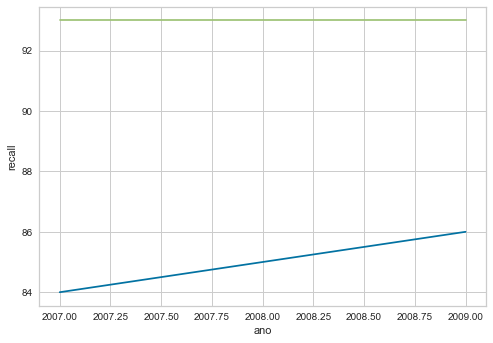

In [154]:
tabela_final = {'ano': [2007, 2008, 2009], 'acuracia':[84, 85, 86], 'recall':[93,93,93]}

a = pd.DataFrame.from_dict(tabela_final)

sns.lineplot(a['ano'], a['acuracia'])
sns.lineplot(a['ano'], a['recall']);